# **Fire and Smoke Detection**



*   Fire detection task is crucial for people safety. Several fire detection systems were developed to prevent damages caused by fire. One can find different technical solutions.
*   Most of them are sensors based and are also generally limited to indoors. Due to rapid developments in digital camera technology and video processing techniques, there is a significant tendency to replace standard fire detection methods with computer vision based systems.
*   Video based fire detection techniques are well suited to detect fire in large and open spaces.


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_data_gen = ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
training_set = training_data_gen.flow_from_directory(
    '/content/gdrive/My Drive/SC/data/img_data/train',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 1048 images belonging to 3 classes.


In [ ]:
testing_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
testing_set = testing_datagen.flow_from_directory(
    '/content/gdrive/My Drive/SC/data/img_data/test',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 171 images belonging to 3 classes.


In [ ]:
print(training_set[0][1]) #batch 0 => labels and in training_set[0][0]=>batch 0 feature vector

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
training_set[0]

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [ ]:
testing_set[0]

(array([[[[0.01568628, 0.        , 0.        ],
          [0.01176471, 0.00392157, 0.00784314],
          [0.00784314, 0.        , 0.00392157],
          ...,
          [0.00784314, 0.        , 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.        , 0.00784314, 0.01176471],
          [0.        , 0.00784314, 0.00392157],
          [0.00784314, 0.01568628, 0.01176471],
          ...,
          [0.01568628, 0.        , 0.        ],
          [0.01960784, 0.00392157, 0.        ],
          [0.01960784, 0.        , 0.00392157]],
 
         [[0.01960784, 0.        , 0.00392157],
          [0.03921569, 0.01568628, 0.02352941],
          [0.03137255, 0.00784314, 0.02352941],
          ...,
          [0.00392157, 0.01176471, 0.00784314],
          [0.01176471, 0.00784314, 0.        ],
          [0.00392157, 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.00392157, 0.01176471],
          [0.02352

# **CNN ARCHITECTURE**



# 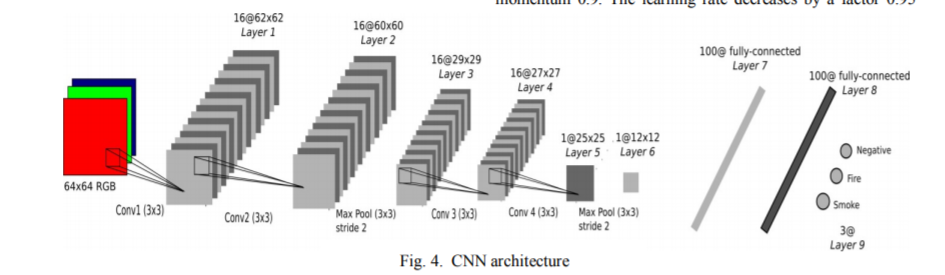

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3, strides= 2))
cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3, strides= 2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=100, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=100, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))


In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn.fit(x = training_set, validation_data = testing_set, epochs=12)

Epoch 1/12
33/33 [==============================] - 16s 495ms/step - loss: 0.9704 - accuracy: 0.5010 - val_loss: 1.2603 - val_accuracy: 0.2573
Epoch 2/12
33/33 [==============================] - 16s 483ms/step - loss: 0.8459 - accuracy: 0.6240 - val_loss: 1.2100 - val_accuracy: 0.3041
Epoch 3/12
33/33 [==============================] - 16s 480ms/step - loss: 0.7037 - accuracy: 0.7137 - val_loss: 0.8849 - val_accuracy: 0.5673
Epoch 4/12
33/33 [==============================] - 16s 484ms/step - loss: 0.6037 - accuracy: 0.7719 - val_loss: 1.0450 - val_accuracy: 0.5439
Epoch 5/12
33/33 [==============================] - 16s 478ms/step - loss: 0.5409 - accuracy: 0.8053 - val_loss: 0.8459 - val_accuracy: 0.6023
Epoch 6/12
33/33 [==============================] - 16s 472ms/step - loss: 0.5050 - accuracy: 0.8053 - val_loss: 1.0504 - val_accuracy: 0.6140
Epoch 7/12
33/33 [==============================] - 16s 478ms/step - loss: 0.4643 - accuracy: 0.8311 - val_loss: 1.0629 - val_accuracy: 0.5848

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 27, 16)        2320      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)             

In [ ]:
scores = cnn.evaluate(training_set)
print(scores[1]*100)

33/33 [==============================] - 12s 350ms/step - loss: 0.3129 - accuracy: 0.8798
87.97709941864014


In [ ]:
scores = cnn.evaluate(testing_set)
print(scores[1]*100)

6/6 [==============================] - 1s 85ms/step - loss: 1.1444 - accuracy: 0.5263
52.63158082962036


# Preprocess Test Data

In [ ]:
#for testing purpose considering batch 0
testing_set_label=testing_set[0][1]
testing_set_sample=testing_set[0][0]

In [ ]:
predictions=cnn.predict(testing_set_sample,batch_size=32,verbose=0)

In [ ]:
predictions

array([[6.1925060e-01, 3.1881150e-02, 3.4886819e-01],
       [5.2106589e-02, 5.5326276e-02, 8.9256710e-01],
       [7.9194009e-01, 4.4483924e-03, 2.0361142e-01],
       [8.6457934e-03, 9.2044127e-01, 7.0912980e-02],
       [3.1699810e-02, 8.9619583e-01, 7.2104305e-02],
       [5.7756901e-01, 1.2350197e-01, 2.9892901e-01],
       [6.2891084e-01, 7.1114145e-02, 2.9997495e-01],
       [9.7644061e-01, 2.3585071e-03, 2.1200877e-02],
       [9.9960536e-01, 2.3232919e-06, 3.9236172e-04],
       [9.4014561e-01, 4.8037677e-05, 5.9806369e-02],
       [1.1968548e-01, 6.1449163e-02, 8.1886536e-01],
       [8.7674284e-01, 2.4304401e-02, 9.8952755e-02],
       [9.6455291e-02, 4.8631027e-02, 8.5491371e-01],
       [1.3110694e-03, 9.6199071e-01, 3.6698159e-02],
       [8.8101029e-01, 5.0270912e-04, 1.1848699e-01],
       [2.2292712e-01, 5.1166224e-01, 2.6541060e-01],
       [1.4323920e-01, 3.7135181e-03, 8.5304731e-01],
       [1.2019467e-01, 1.1026928e-02, 8.6877841e-01],
       [7.4013597e-01, 6.094

In [ ]:
#Rounding the decimal values to the correct label
rounded_predictions=[]
for arr in predictions:
  if arr[0]>arr[1] and arr[0]>arr[2]:
    rounded_predictions.append([1,0,0])
  elif arr[1]>arr[0] and arr[1]>arr[2]:
    rounded_predictions.append([0,1,0])
  else:
    rounded_predictions.append([0,0,1])

rounded_predictions

[[1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1]]

In [ ]:
rounded_predictions=np.array(rounded_predictions)

# Confusion Matrix

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
#cm=confusion_matrix(testing_set_label,rounded_predictions)
cm=confusion_matrix(testing_set_label.argmax(axis=1), rounded_predictions.argmax(axis=1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[11  1  3]
 [ 2  5  6]
 [ 3  0  1]]


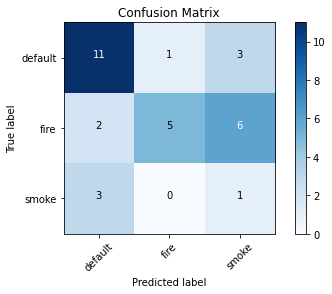

In [ ]:
cm_plot_labels=['default','fire','smoke']
plot_confusion_matrix(cm,cm_plot_labels,title="Confusion Matrix")

# **PREDICTIONS**

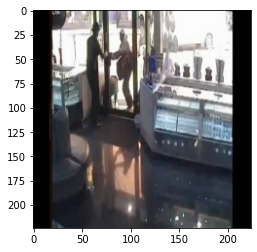

[[1. 0. 0.]]
Nothing Detected!


In [ ]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
im = cv2.imread('/content/gdrive/My Drive/SC/data/img_data/test/default/img_345.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(im)
plt.show()
test_image = image.load_img('/content/gdrive/My Drive/SC/data/img_data/test/default/img_345.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
if result[0][0] == 1:
  print("Nothing Detected!")
elif result[0][1] == 1:
  print("Fire Detected!")
elif result[0][2] == 1:
  print("Smoke Detected")

Populating the interactive namespace from numpy and matplotlib


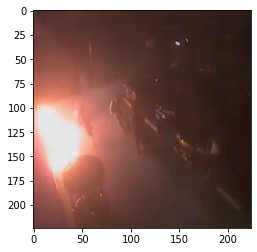

[[0. 1. 0.]]
Fire Detected!


In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/My Drive/SC/data/img_data/test/fire/img_104.jpg')
imgplot = plt.imshow(img)
plt.show()
test_image = image.load_img('/content/gdrive/My Drive/SC/data/img_data/test/fire/img_104.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
if result[0][0] == 1:
  print("Nothing Detected!")
elif result[0][1] == 1:
  print("Fire Detected!")
elif result[0][2] == 1:
  print("Smoke Detected")

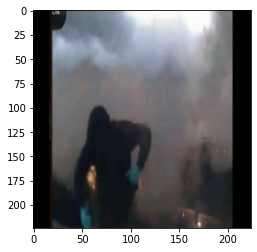

[[0. 0. 1.]]
Smoke Detected


In [ ]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
im = cv2.imread('/content/gdrive/My Drive/SC/data/img_data/test/smoke/img_362.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(im)
plt.show()
test_image = image.load_img('/content/gdrive/My Drive/SC/data/img_data/test/smoke/img_362.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
if result[0][0] == 1:
  print("Nothing Detected!")
elif result[0][1] == 1:
  print("Fire Detected!")
elif result[0][2] == 1:
  print("Smoke Detected")

# Model Save

In [ ]:
cnn.save('fire_smoke_detection_model.h5')

In [ ]:
from keras.models import load_model
new_model = load_model('fire_smoke_detection_model.h5')

In [ ]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 27, 16)        2320      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)             

In [ ]:
new_model.get_weights()

[array([[[[ 0.02557517, -0.11718022, -0.11021983, -0.00181737,
           -0.0877386 , -0.06004868, -0.07567518,  0.17281644,
           -0.04039558, -0.0363756 ,  0.02513159, -0.05281381,
           -0.15651274,  0.12334641,  0.00678657,  0.03728052],
          [ 0.0689914 ,  0.1128759 , -0.08424331,  0.13332437,
           -0.06893687, -0.06036568, -0.1232969 , -0.14188069,
           -0.09217912,  0.11702649,  0.15906927,  0.1536334 ,
           -0.13117786, -0.12090393, -0.10627569,  0.02977717],
          [ 0.14578706, -0.06643132,  0.13333078, -0.03244255,
           -0.16420272,  0.14774108, -0.09811275,  0.13374545,
            0.16790186, -0.11866572, -0.10057522,  0.0265688 ,
           -0.0782565 , -0.04497208,  0.13489446,  0.16301173]],
 
         [[ 0.15859415,  0.09498027, -0.05052824, -0.0267359 ,
            0.1579086 , -0.09171955,  0.10416894,  0.11683314,
           -0.18741061, -0.02694258, -0.11339153, -0.00817805,
            0.10836945, -0.16784504,  0.14458415,

In [ ]:
new_model.optimizer